In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
#get column information (station)
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11d8c4b50>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

In [11]:
#get column info (measurement)
first_row_measure = session.query(measurement).first()
first_row_measure.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11d936610>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

# 1 year before last date is query_date 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
twelvemonth = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date > query_date).\
    order_by(measurement.date).statement

('2017-08-23',)
Query Date:  2016-08-22


In [35]:
# Save the query results as a Pandas DataFrame and set the index to the date column
conn=engine.connect()
df = pd.read_sql_query(twelvemonth, conn)
df = df.rename(columns={'date':'Date',
                  'prcp':'Precipitation'})

# Sort the dataframe by date
date_df = df.sort_values('Date')
date_df = date_df.dropna()
date_df.loc[date_df['Precipitation'] > 3.5]

,Precipitation,Date
144,6.70,2016-09-14
1093,5.04,2017-02-11
1571,6.25,2017-04-29
2081,4.00,2017-07-22


(736199.0, 736564.0)

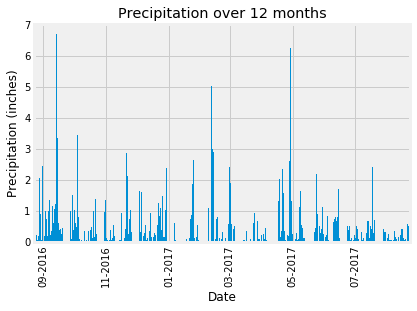

In [61]:
# Define axis, x-axis is object; converted to datetime format
x_axis = [datetime.strptime(r.Date,'%Y-%m-%d').date() for r in date_df.itertuples(index=True)]
y_axis = date_df.Precipitation

# plot bar graph with defined x- and y-axis
fig, ax = plt.subplots()
ax.bar(x_axis, y_axis)

#use the DateFormatter to format x-axis with monthly x-ticks
import matplotlib.dates as mdates
months = mdates.MonthLocator()    #every month

myFmt = mdates.DateFormatter('%m-%Y')  #format ticker to read 'month-year'

ax.set_xticklabels(x_axis, rotation=90)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_minor_locator(months)


ax.set_title('Precipitation over 12 months')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_xlim(min(x_axis),max(x_axis))


In [56]:
max(x_axis)

datetime.date(2017, 8, 23)